# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [2]:
df = pd.read_csv('data/ames.csv', index_col=0)

The following code checks that you loaded the data correctly:

In [3]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [4]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [5]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

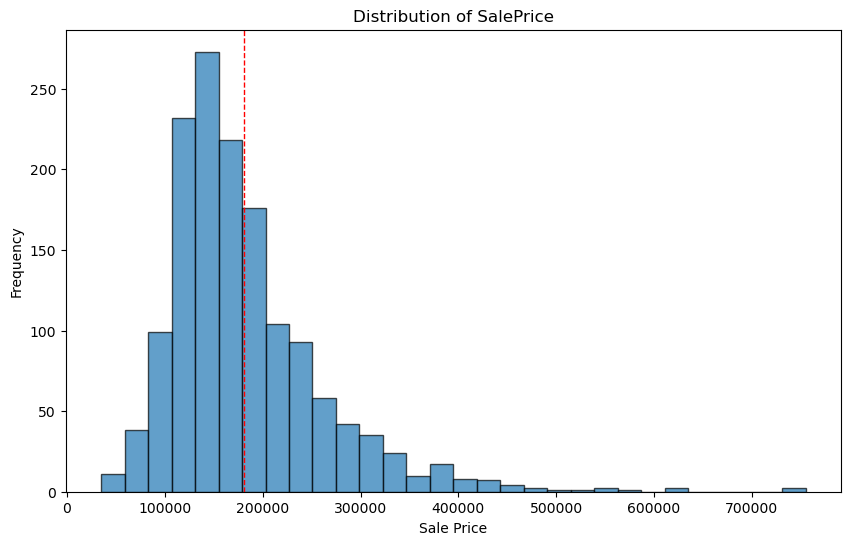

In [7]:
# Histogram for SalePrice
plt.figure(figsize=(10, 6))
plt.hist(df['SalePrice'], bins=30, edgecolor='black', alpha=0.7) # Adjust bins as needed
plt.title('Distribution of SalePrice')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.axvline(df['SalePrice'].mean(), color='red', linestyle='dashed', linewidth=1) # Mean line
plt.show()

Now, print out the mean, median, and standard deviation:

In [11]:
# SalePrice statistics
print("SalePrice:")
print(f"Mean: {df['SalePrice'].mean()}")
print(f"Median: {df['SalePrice'].median()}")
print(f"Standard Deviation: {df['SalePrice'].std()}")


SalePrice:
Mean: 180921.19589041095
Median: 163000.0
Standard Deviation: 79442.50288288663


In the cell below, interpret the above information.

# Interpretation of SalePrice:

### Distribution:
The distribution of SalePrice is right-skewed, meaning there are more houses with lower sale prices 
and fewer houses with very high sale prices.

### Mean vs. Median:
The mean (180921.19) is higher than the median (163000.0), which confirms the right skew. 
This indicates that the average sale price is influenced by the presence of some expensive houses.

### Standard Deviation:
The standard deviation (79442.50) is relatively large, indicating a significant amount of variability in sale prices.
This suggests that house prices in the dataset are quite spread out.

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

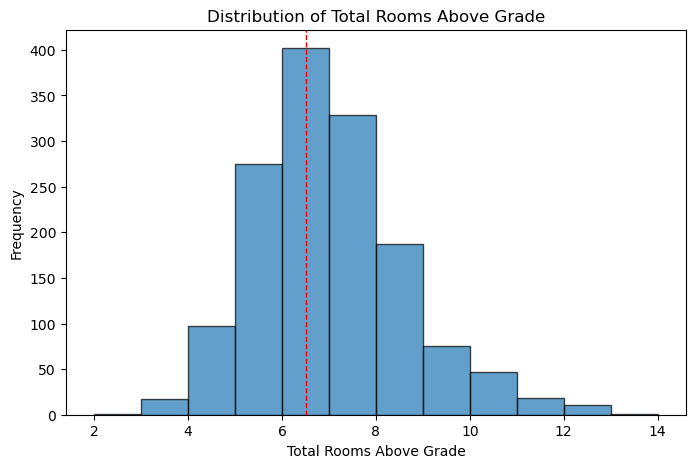

In [9]:
# Histogram for TotRmsAbvGrd
plt.figure(figsize=(8, 5))
plt.hist(df['TotRmsAbvGrd'], bins=df['TotRmsAbvGrd'].nunique(), edgecolor='black', alpha=0.7) # Bins for discrete data
plt.title('Distribution of Total Rooms Above Grade')
plt.xlabel('Total Rooms Above Grade')
plt.ylabel('Frequency')
plt.axvline(df['TotRmsAbvGrd'].mean(), color='red', linestyle='dashed', linewidth=1) # Mean line
plt.show()

Now, print out the mean, median, and standard deviation:

In [12]:
# TotRmsAbvGrd statistics
print("\nTotal Rooms Above Grade:")
print(f"Mean: {df['TotRmsAbvGrd'].mean()}")
print(f"Median: {df['TotRmsAbvGrd'].median()}")
print(f"Standard Deviation: {df['TotRmsAbvGrd'].std()}")



Total Rooms Above Grade:
Mean: 6.517808219178082
Median: 6.0
Standard Deviation: 1.625393290584064


In the cell below, interpret the above information.

# Interpretation of Total Rooms Above Grade:

### Distribution:
The distribution of Total Rooms Above Grade is approximately symmetric, with a slight lean towards the right.
The most common number of rooms appears to be around 6-7.

### Mean vs. Median:
The mean (6.51) and median (6.0) are relatively close, suggesting a roughly symmetric distribution.
This indicates that the average number of rooms above grade is representative of the typical house in the dataset.

### Standard Deviation:
The standard deviation (1.62) is relatively small, indicating that the number of rooms above grade is not highly variable.
Most houses have a number of rooms close to the mean.

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

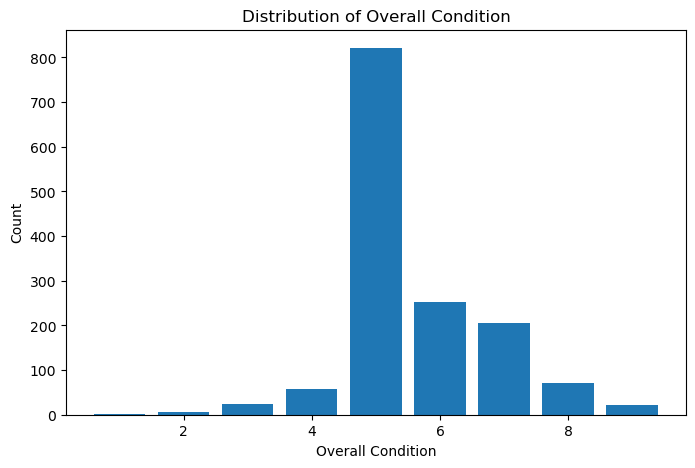

In [10]:
# Histogram for OverallCond (bar plot for categorical data)
overall_cond_counts = df['OverallCond'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
plt.bar(overall_cond_counts.index, overall_cond_counts.values)
plt.title('Distribution of Overall Condition')
plt.xlabel('Overall Condition')
plt.ylabel('Count')
plt.show()

Now, print out the mean, median, and standard deviation:

In [13]:
# OverallCond statistics (for categorical data, mode is more relevant than median)
print("\nOverall Condition:")
print(f"Mean: {df['OverallCond'].mean()}")
print(f"Mode: {df['OverallCond'].mode()[0]}") # Mode is the most frequent value
print(f"Standard Deviation: {df['OverallCond'].std()}")



Overall Condition:
Mean: 5.575342465753424
Mode: 5
Standard Deviation: 1.1127993367127367


In the cell below, interpret the above information.

# Interpretation of Overall Condition:

### Distribution:
The distribution of Overall Condition is heavily concentrated in the categories 5 and 6,indicating that most houses in the dataset are in average or slightly above-average condition.
Categories 1 and 2 have very low counts, suggesting that houses in poor condition are rare.

### Mean:
The mean overall condition is approximately 5.58, which is consistent with the concentration of houses in the average condition range.

### Mode:
The mode is 5, indicating that the most common overall condition is "Average".

### Standard Deviation:
The standard deviation is approximately 1.11, which is relatively low. This suggests that the overall condition ratings are not very spread out and tend to cluster around the average.

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [14]:
# Replace None with appropriate code
below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [15]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

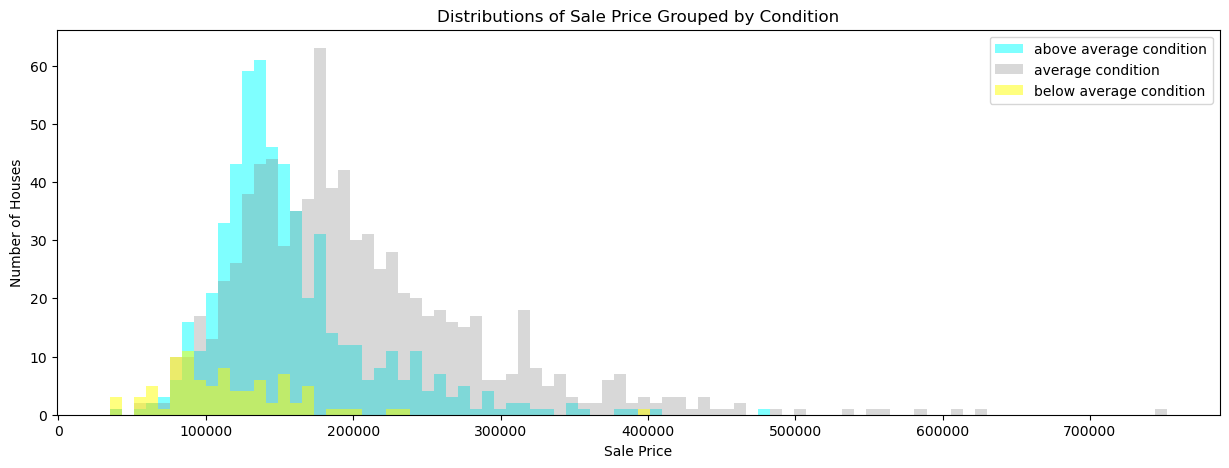

In [16]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

# Interpretation:

The plot shows that houses with above-average condition (OverallCond > 5) tend to have significantly higher sale prices than houses with average or below-average conditions.
The distribution for above-average condition is shifted towards higher prices, with a peak around $200,000 - $300,000.
The distribution for below-average condition (OverallCond < 5) is concentrated at lower prices, with a peak around $100,000 - $150,000.
The average condition (OverallCond = 5) distribution falls in between the other two, showing a moderate range of sale prices.

The relationship between OverallCond and SalePrice is clear: better overall condition generally corresponds to higher sale prices.
This suggests that buyers are willing to pay a premium for houses in better condition.


## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [17]:
# Your code here
correlation_matrix = df.corr()['SalePrice'].sort_values(ascending=False)
most_positive_correlation = correlation_matrix.index[1]  # Skip SalePrice itself
print(f"Most positively correlated column: {most_positive_correlation}")

Most positively correlated column: OverallQual


C:\Users\biggm\AppData\Local\Temp\ipykernel_26748\2496468716.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()['SalePrice'].sort_values(ascending=False)


Now, find the ***most negatively correlated*** column:

In [18]:
# Your code here
most_negative_correlation = correlation_matrix.index[-1]
print(f"Most negatively correlated column: {most_negative_correlation}")

Most negatively correlated column: KitchenAbvGr


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

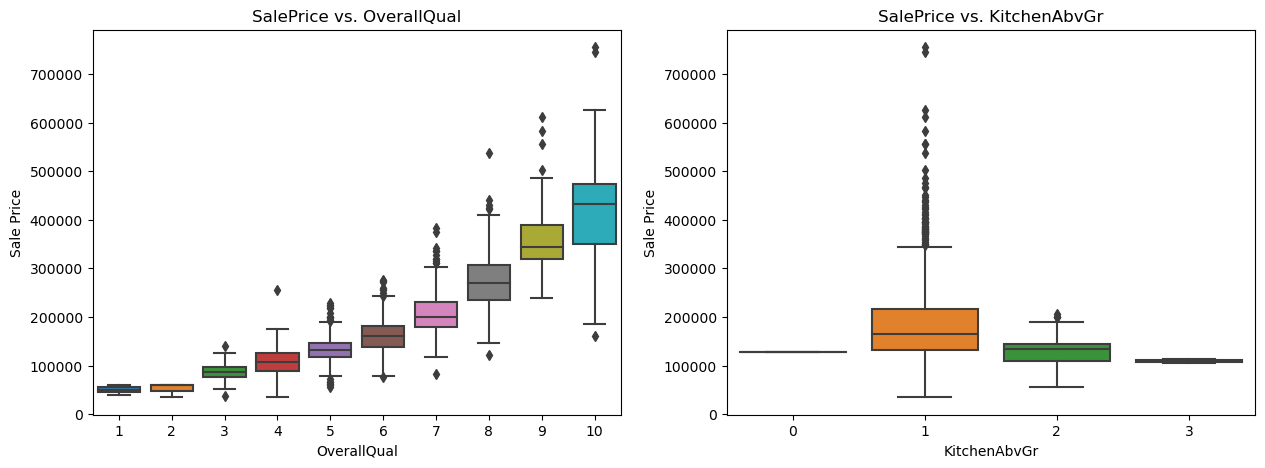

In [19]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df[most_positive_correlation],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df[most_negative_correlation],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title(f'SalePrice vs. {most_positive_correlation}')
ax1.set_xlabel(most_positive_correlation)
ax1.set_ylabel('Sale Price')

ax2.set_title(f'SalePrice vs. {most_negative_correlation}')
ax2.set_xlabel(most_negative_correlation)
ax2.set_ylabel('Sale Price')

plt.show()


Interpret the results below. Consult `data/data_description.txt` as needed.

# Interpretation:

The most positively correlated column with SalePrice is OverallQual.
This indicates that the overall quality of the material and finish of the house is a strong predictor of sale price.
The box plot shows a clear positive relationship, with higher quality homes commanding significantly higher sale prices.

The most negatively correlated column with SalePrice is KitchenAbvGr.
This indicates that as the number of kitchens above ground increases (especially beyond 1), the sale price tends to decrease.
This might seem counterintuitive, but it could suggest that houses with multiple kitchens are often older,less desirable properties or have other characteristics that negatively impact their value.

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [20]:
# Run this cel l without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

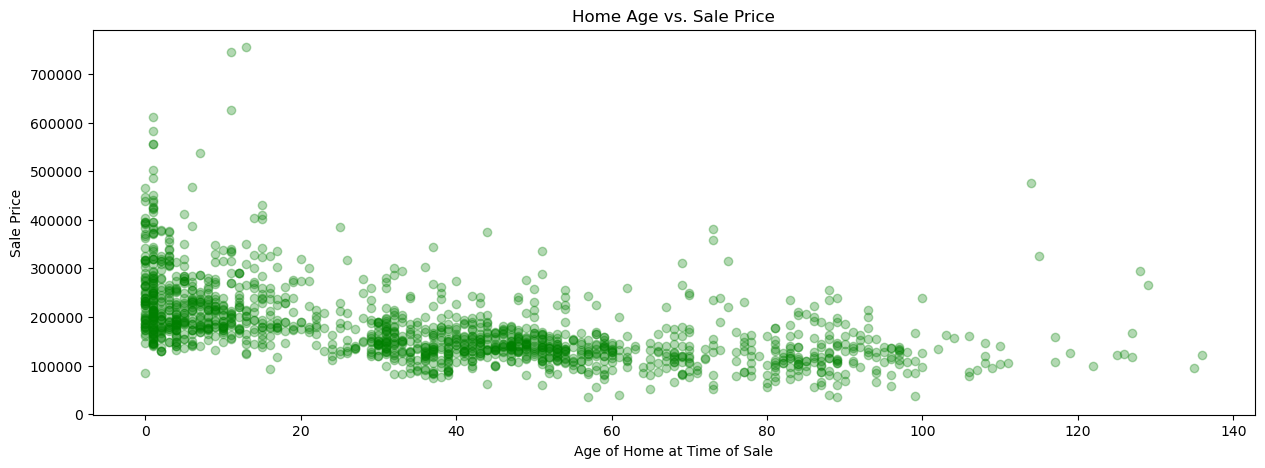

In [21]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

# Interpretation:

The value counts of YrSold show that the sales are relatively evenly distributed across the years 2006-2009,with a noticeable drop in sales in 2010. This drop could be due to changes in the housing market or other factors.

The scatter plot of Age vs. SalePrice shows a weak negative trend.
Older homes tend to have slightly lower sale prices, but the relationship is not very strong.
There is a lot of scatter in the data, indicating that age is not the only, or even the primary, factor influencing sale price.

There are some outliers, particularly some very old homes with high sale prices.
These could be historic properties, renovated homes, or other unique cases that deviate from the general trend.

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.